# A primer of plotting with Python

In [ ]:
# If running in colaboratory uncomment and run the folliwing command
#!pip install seaborn --upgrade

In [1]:
import seaborn as sns
sns.set(style="ticks")

import pandas as pd
import matplotlib.pyplot as plt

# Why plotting?
We will use [Ascombe's quartet](https://en.wikipedia.org/wiki/Anscombe%27s_quartet) build into Seaborn to answer this questions

In [2]:
# Load the example dataset for Anscombe's quartet
df = sns.load_dataset("anscombe")

In [3]:
df

,dataset,x,y
0,I,10.0,8.04
1,I,8.0,6.95
2,I,13.0,7.58
3,I,9.0,8.81
4,I,11.0,8.33
5,I,14.0,9.96
6,I,6.0,7.24
7,I,4.0,4.26
8,I,12.0,10.84
9,I,7.0,4.82


In [4]:
df.groupby('dataset').describe()

x                                               y            \
        count mean       std  min  25%  50%   75%   max count      mean   
dataset                                                                   
I        11.0  9.0  3.316625  4.0  6.5  9.0  11.5  14.0  11.0  7.500909   
II       11.0  9.0  3.316625  4.0  6.5  9.0  11.5  14.0  11.0  7.500909   
III      11.0  9.0  3.316625  4.0  6.5  9.0  11.5  14.0  11.0  7.500000   
IV       11.0  9.0  3.316625  8.0  8.0  8.0   8.0  19.0  11.0  7.500909   

                                                   
              std   min    25%   50%   75%    max  
dataset                                            
I        2.031568  4.26  6.315  7.58  8.57  10.84  
II       2.031657  3.10  6.695  8.14  8.95   9.26  
III      2.030424  5.39  6.250  7.11  7.98  12.74  
IV       2.030579  5.25  6.170  7.04  8.19  12.50

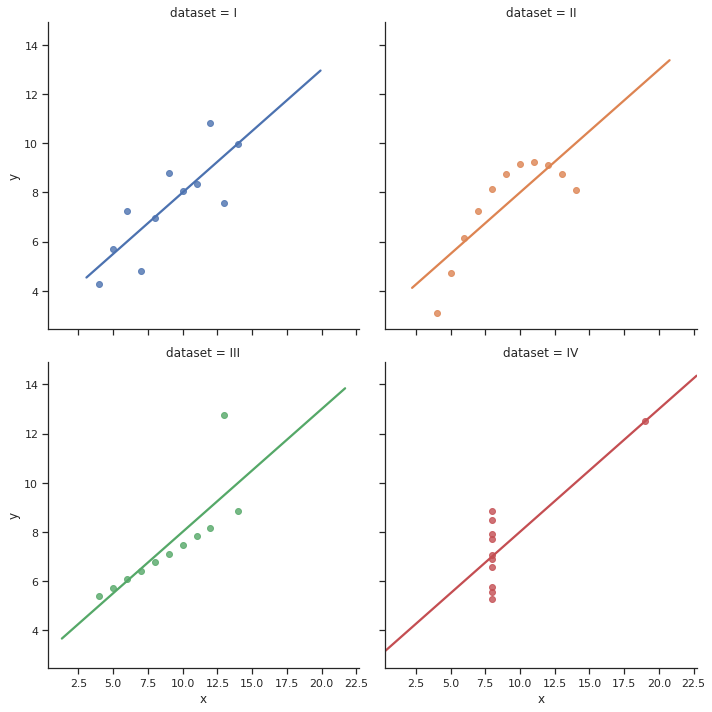

In [5]:
# Show the results of a linear regression within each dataset
sns.lmplot(x="x", y="y", col="dataset", hue="dataset", data=df,
           col_wrap=2, ci=None
           )

## Let's look at TnSeq data again

In [6]:
%%bash
wget https://nekrut.github.io/BMMB554/tnseq_untreated.txt.gz
wget https://nekrut.github.io/BMMB554/ta_gc.txt

--2019-02-04 18:36:13--  https://nekrut.github.io/BMMB554/tnseq_untreated.txt.gz
Resolving nekrut.github.io... 185.199.111.153, 185.199.109.153, 185.199.110.153, ...
Connecting to nekrut.github.io|185.199.111.153|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2012967 (1.9M) [application/gzip]
Saving to: ‘tnseq_untreated.txt.gz.1’

     0K .......... .......... .......... .......... ..........  2%  881K 2s
    50K .......... .......... .......... .......... ..........  5% 1.71M 2s
   100K .......... .......... .......... .......... ..........  7% 31.0M 1s
   150K .......... .......... .......... .......... .......... 10% 1.96M 1s
   200K .......... .......... .......... .......... .......... 12% 10.6M 1s
   250K .......... .......... .......... .......... .......... 15% 24.1M 1s
   300K .......... .......... .......... .......... .......... 17% 39.8M 1s
   350K .......... .......... .......... .......... .......... 20% 2.32M 1s
   400K .......... .......... ..

In [7]:
data_file = 'tnseq_untreated.txt.gz'

In [8]:
# Process tnseq_untreated.txt.gz to correctly parse gene names

import os
f = open('data.txt','w')

with os.popen('gunzip -c {}'.format(data_file)) as stream:
  for line in stream:
    if line.split( '\t' )[7].startswith( '.' ):
      f.write( '{}\t{}\n'.format( '\t'.join( line.split( '\t' )[:7] ) , 'intergenic'  ) )
    elif line.split( '\t' )[7].startswith( 'ID' ):
      f.write( '{}\t{}\n'.format( '\t'.join( line.split( '\t' )[:7] ) , line.split( '\t' )[7].split(';')[0][3:] ) )
f.close()

In [9]:
# Reading TnSeq data into a dataframe

tnseq = pd.read_table('data.txt', header=None, names=['pos','blunt','cap','dual','erm','pen','tuf','gene'])

In [10]:
# Reading GC content data

gc = pd.read_table('ta_gc.txt', header=None, names=['pos','gc'])

In [11]:
tnseq.head()

,pos,blunt,cap,dual,erm,pen,tuf,gene
0,2400002,0.0,0.0,1.0,0.0,0.0,1.0,intergenic
1,2400004,1.0,0.0,5.0,0.0,0.0,1.0,intergenic
2,2400006,1.0,0.0,5.0,1.0,0.0,1.0,intergenic
3,2400009,2.0,2.0,8.0,1.0,0.0,0.0,intergenic
4,2400029,6.0,1.0,0.0,1.0,0.0,1.0,intergenic


In [12]:
gc.head()

,pos,gc
0,4,0.339286
1,10,0.354839
2,16,0.367647
3,42,0.372340
4,79,0.303922


In [13]:
# Join tnseq and GC content data together

tn_gc = tnseq.merge(gc,left_on='pos',right_on='pos',how='left')

In [14]:
tn_gc.head()

,pos,blunt,cap,dual,erm,pen,tuf,gene,gc
0,2400002,0.0,0.0,1.0,0.0,0.0,1.0,intergenic,0.225490
1,2400004,1.0,0.0,5.0,0.0,0.0,1.0,intergenic,0.225490
2,2400006,1.0,0.0,5.0,1.0,0.0,1.0,intergenic,0.215686
3,2400009,2.0,2.0,8.0,1.0,0.0,0.0,intergenic,0.225490
4,2400029,6.0,1.0,0.0,1.0,0.0,1.0,intergenic,0.215686


In [15]:
# This is the list of column containing construct data

list(tn_gc)[1:7]

['blunt', 'cap', 'dual', 'erm', 'pen', 'tuf']

## "Melting data"

Visualization work much better with so called [narrow data](https://en.wikipedia.org/wiki/Wide_and_narrow_data). To convert our existing dataset into "narrow" form we will melt it down:

![](https://pandas.pydata.org/pandas-docs/stable/_images/reshaping_melt.png)

(This image and a much more detailed explanation of dataframe reshaping can be found in [Pandas Doc Pages](https://pandas.pydata.org/pandas-docs/stable/user_guide/reshaping.html)).

In [16]:
# Melt tn_gc in tdf

tdf = pd.melt(tn_gc, id_vars=['pos','gc','gene'],value_vars=list(tn_gc)[1:7],var_name="construct",value_name="count").sort_values(by='pos')

In [17]:
tdf.head()

,pos,gc,gene,construct,count
406329,4,0.339286,intergenic,cap,1.0
1486729,4,0.339286,intergenic,tuf,0.0
1216629,4,0.339286,intergenic,pen,0.0
676429,4,0.339286,intergenic,dual,0.0
136229,4,0.339286,intergenic,blunt,0.0


In [18]:
# Set genic and non-genic categories

tdf.loc[tdf['gene'] == 'intergenic','genic'] = 'no'
tdf.loc[tdf['gene'] != 'intergenic','genic'] = 'yes'

In [19]:
tdf.head()

,pos,gc,gene,construct,count,genic
406329,4,0.339286,intergenic,cap,1.0,no
1486729,4,0.339286,intergenic,tuf,0.0,no
1216629,4,0.339286,intergenic,pen,0.0,no
676429,4,0.339286,intergenic,dual,0.0,no
136229,4,0.339286,intergenic,blunt,0.0,no


# Visualizing the distribution of a dataset
When dealing with a set of data, often the first thing you’ll want to do is get a sense for how the variables are distributed. This chapter of the tutorial will give a brief introduction to some of the tools in seaborn for examining univariate and bivariate distributions. You may also want to look at the categorical plots chapter for examples of functions that make it easy to compare the distribution of a variable across levels of other variables.

These examples are taken from [official seaborn tutorials](https://seaborn.pydata.org/tutorial.html).

## Plotting univariate distributions
The most convenient way to take a quick look at a univariate distribution in seaborn is the [`distplot()`](https://seaborn.pydata.org/generated/seaborn.distplot.html#seaborn.distplot) function. By default, this will draw a [histogram](https://en.wikipedia.org/wiki/Histogram) and fit a kernel density estimate [KDE](https://en.wikipedia.org/wiki/Kernel_density_estimation)



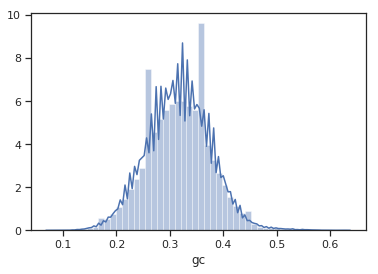

In [20]:
# Distribution of GC content 

sns.distplot(tdf['gc'])

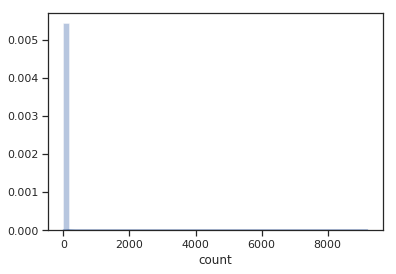

In [21]:
# Distribution of read counts is a bit gloomy

sns.distplot(tdf['count'])

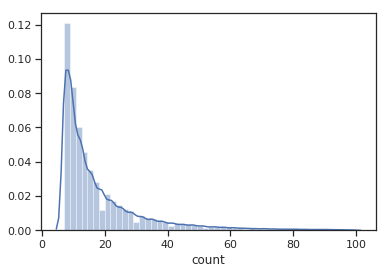

In [22]:
# We can narrow it down

sns.distplot(tdf['count'][(tdf['count']>6)&(tdf['count']<100)])

[None]

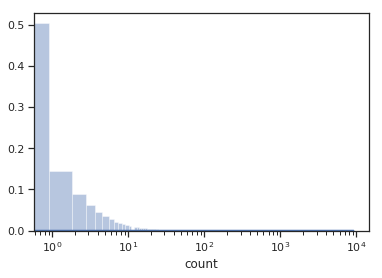

In [23]:
# Or increase the number of bins and change the scale

g=sns.distplot(tdf['count'],bins=10000)
g.set(xscale="log")

[None]

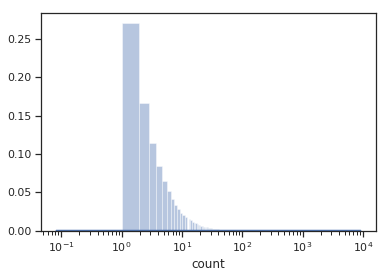

In [24]:
# And also get rid of zero counts

g=sns.distplot(tdf['count'][tdf['count']>0],bins=10000)
g.set(xscale="log")


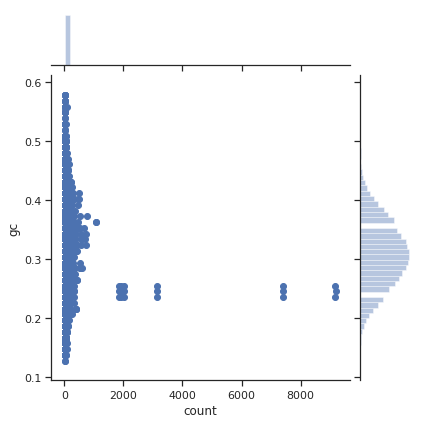

In [25]:
# Plotting the relationship between GC count and insertion frequency

sns.jointplot(x="count", y="gc", data=tdf[tdf['count']>10]);

# Visualizing statistical relationships
Statistical analysis is a process of understanding how variables in a dataset relate to each other and how those relationships depend on other variables. Visualization can be a core component of this process because, when data are visualized properly, the human visual system can see trends and patterns that indicate a relationship.

We will discuss three seaborn functions in this tutorial. The one we will use most is [ `relplot()`](https://seaborn.pydata.org/generated/seaborn.relplot.html#seaborn.relplot). This is a [figure-level function](https://seaborn.pydata.org/introduction.html#intro-func-types) for visualizing statistical relationships using two common approaches: scatter plots and line plots. [ `relplot()`](https://seaborn.pydata.org/generated/seaborn.relplot.html#seaborn.relplot) combines a [FacetGrid](https://seaborn.pydata.org/generated/seaborn.FacetGrid.html#seaborn.FacetGrid) with one of two axes-level functions:

 - [`scatterplot()`](https://seaborn.pydata.org/generated/seaborn.scatterplot.html#seaborn.scatterplot) (with `kind="scatter"`; the default)
 - [`lineplot()`](https://seaborn.pydata.org/generated/seaborn.lineplot.html#seaborn.lineplot) (with `kind="line"`)
 
As we will see, these functions can be quite illuminating because they use simple and easily-understood representations of data that can nevertheless represent complex dataset structures. They can do so because they plot two-dimensional graphics that can be enhanced by mapping up to three additional variables using the semantics of hue, size, and style.

## Relating variables with scatter plots
The scatter plot is a mainstay of statistical visualization. It depicts the joint distribution of two variables using a cloud of points, where each point represents an observation in the dataset. This depiction allows the eye to infer a substantial amount of information about whether there is any meaningful relationship between them.

There are several ways to draw a scatter plot in seaborn. The most basic, which should be used when both variables are numeric, is the [`scatterplot()`](https://seaborn.pydata.org/generated/seaborn.scatterplot.html#seaborn.scatterplot) function. The [`scatterplot()`](https://seaborn.pydata.org/generated/seaborn.scatterplot.html#seaborn.scatterplot) is the default kind in [`relplot()`](https://seaborn.pydata.org/generated/seaborn.relplot.html#seaborn.relplot) (it can also be forced by setting `kind="scatter"`):

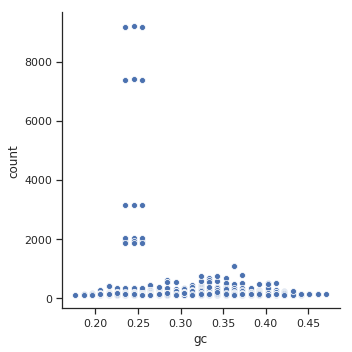

In [26]:
sns.relplot(x='gc',y='count',data=tdf[tdf['count']>100])

While the points are plotted in two dimensions, another dimension can be added to the plot by coloring the points according to a third variable. In seaborn, this is referred to as using a “hue semantic”, because the color of the point gains meaning:

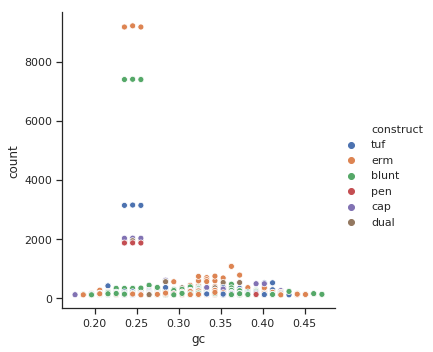

In [27]:
sns.relplot(x='gc',y='count',data=tdf[tdf['count']>100],hue='construct')

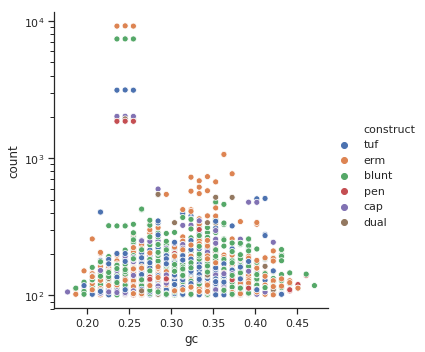

In [28]:
# Here we change y axis to log scale

g = sns.relplot(x='gc',y='count',data=tdf[tdf['count']>100],hue='construct')
g.set(yscale="log")

To emphasize the difference between the classes, and to improve accessibility, you can use a different marker style for each class:

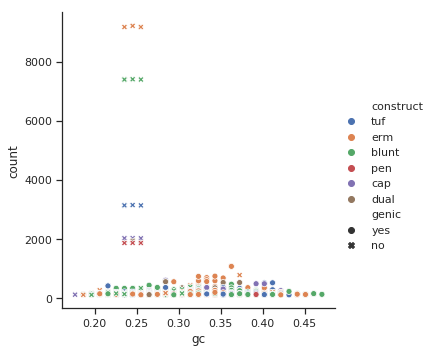

In [29]:
sns.relplot(x='gc',y='count',data=tdf[tdf['count']>100],hue='construct',style='genic')

# Categorical scatterplots
The default representation of the data in [`catplot()`](https://seaborn.pydata.org/generated/seaborn.catplot.html#seaborn.catplot) uses a scatterplot. There are actually two different categorical scatter plots in seaborn. They take different approaches to resolving the main challenge in representing categorical data with a scatter plot, which is that all of the points belonging to one category would fall on the same position along the axis corresponding to the categorical variable. The approach used by [`stripplot()`](https://seaborn.pydata.org/generated/seaborn.stripplot.html#seaborn.stripplot), which is the default “kind” in [`catplot()`](https://seaborn.pydata.org/generated/seaborn.catplot.html#seaborn.catplot) is to adjust the positions of points on the categorical axis with a small amount of random “jitter”:

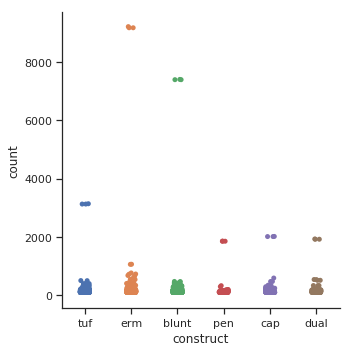

In [30]:
sns.catplot(x="construct", y="count", data=tdf[tdf['count']>100]);

The `jitter` parameter controls the magnitude of jitter or disables it altogether:

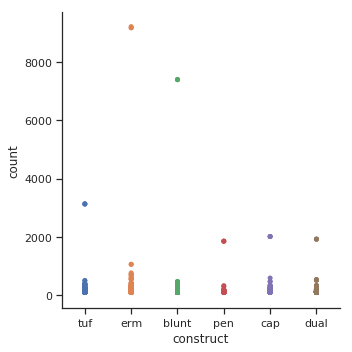

In [31]:
sns.catplot(x="construct", y="count", data=tdf[tdf['count']>100],jitter=False);

The second approach adjusts the points along the categorical axis using an algorithm that prevents them from overlapping. It can give a better representation of the distribution of observations, although it only works well for relatively small datasets. This kind of plot is sometimes called a “beeswarm” and is drawn in seaborn by [`swarmplot()`](https://seaborn.pydata.org/generated/seaborn.swarmplot.html#seaborn.swarmplot), which is activated by setting `kind="swarm"` in [`catplot()`](https://seaborn.pydata.org/generated/seaborn.catplot.html#seaborn.catplot):

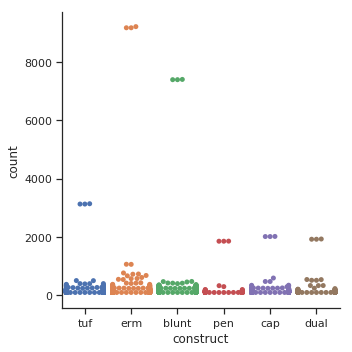

In [32]:
sns.catplot(x="construct", y="count", data=tdf[tdf['count']>100],kind="swarm")

Similar to the relational plots, it’s possible to add another dimension to a categorical plot by using a `hue` semantic. (The categorical plots do not currently support `size` or `style` semantics). Each different categorical plotting function handles the `hue` semantic differently. For the scatter plots, it is only necessary to change the color of the points:

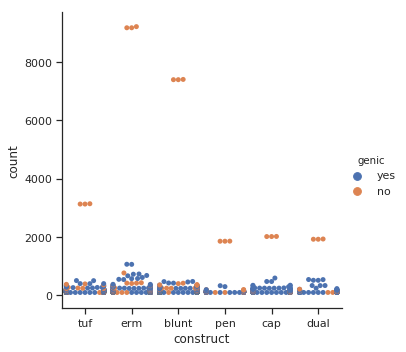

In [33]:
sns.catplot(x="construct", y="count", data=tdf[tdf['count']>100],kind="swarm",hue='genic')

We’ve referred to the idea of “categorical axis”. In these examples, that’s always corresponded to the horizontal axis. But it’s often helpful to put the categorical variable on the vertical axis (particularly when the category names are relatively long or there are many categories). To do this, swap the assignment of variables to axes:

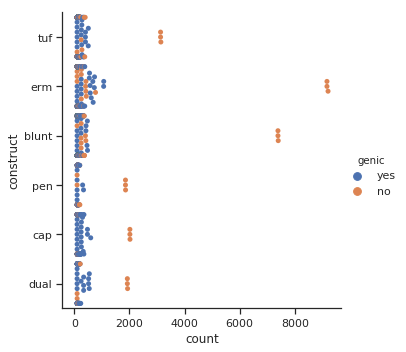

In [34]:
sns.catplot(x="count", y="construct", data=tdf[tdf['count']>100],kind="swarm",hue='genic')

## Distributions of observations within categories
As the size of the dataset grows,, categorical scatter plots become limited in the information they can provide about the distribution of values within each category. When this happens, there are several approaches for summarizing the distributional information in ways that facilitate easy comparisons across the category levels.



### Boxplots
The first is the familiar [`boxplot()`](https://seaborn.pydata.org/generated/seaborn.boxplot.html#seaborn.boxplot). This kind of plot shows the three quartile values of the distribution along with extreme values. The “whiskers” extend to points that lie within 1.5 IQRs of the lower and upper quartile, and then observations that fall outside this range are displayed independently. This means that each value in the boxplot corresponds to an actual observation in the data.

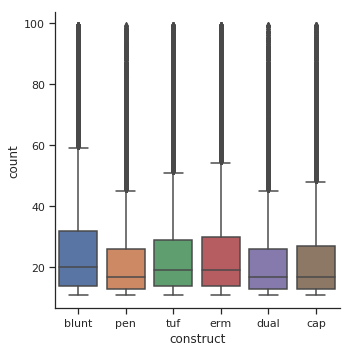

In [35]:
sns.catplot(x="construct", y="count", data=tdf[(tdf['count']>10) & (tdf['count']<100)],kind="box")

When adding a `hue` semantic, the box for each level of the semantic variable is moved along the categorical axis so they don’t overlap:

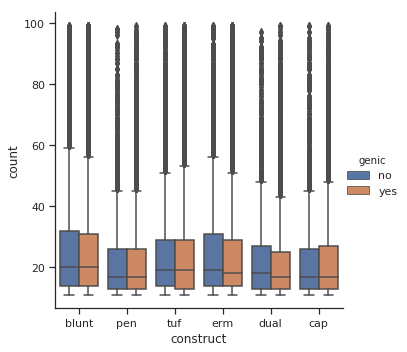

In [36]:
sns.catplot(x="construct", y="count", data=tdf[(tdf['count']>10) & (tdf['count']<100)],kind="box",hue='genic')

A related function, [`boxenplot()`](https://seaborn.pydata.org/generated/seaborn.boxenplot.html#seaborn.boxenplot), draws a plot that is similar to a box plot but optimized for showing more information about the shape of the distribution. It is best suited for larger datasets:


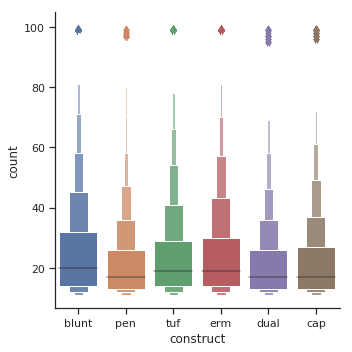

In [37]:
sns.catplot(x="construct", y="count", data=tdf[(tdf['count']>10) & (tdf['count']<100)],kind="boxen")

### Violinplots
A different approach is a [`violinplot()`](https://seaborn.pydata.org/generated/seaborn.violinplot.html#seaborn.violinplot), which combines a boxplot with the kernel density estimation procedure:



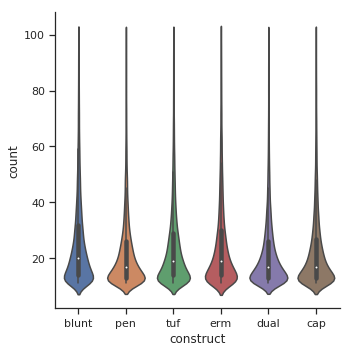

In [38]:
sns.catplot(x="construct", y="count", data=tdf[(tdf['count']>10) & (tdf['count']<100)],kind="violin")

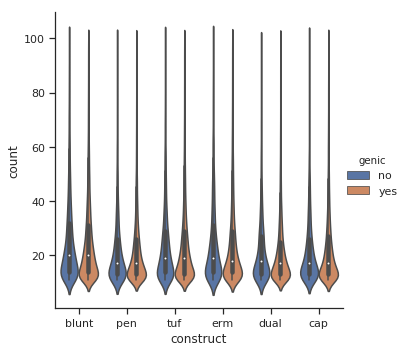

In [39]:
sns.catplot(x="construct", y="count", data=tdf[(tdf['count']>10) & (tdf['count']<100)],kind="violin",hue='genic')

It’s also possible to “split” the violins when the hue parameter has only two levels, which can allow for a more efficient use of space:

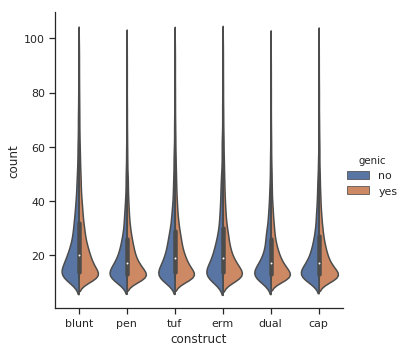

In [40]:
sns.catplot(x="construct", y="count", data=tdf[(tdf['count']>10) & (tdf['count']<100)],kind="violin",hue='genic',split=True)

Finally, there are several options for the plot that is drawn on the interior of the violins, including ways to show each individual observation instead of the summary boxplot values:

## Statistical estimation within categories
For other applications, rather than showing the distribution within each category, you might want to show an estimate of the central tendency of the values. Seaborn has two main ways to show this information. Importantly, the basic API for these functions is identical to that for the ones discussed above.



### Bar plots
A familiar style of plot that accomplishes this goal is a bar plot. In seaborn, the [`barplot()`](https://seaborn.pydata.org/generated/seaborn.barplot.html#seaborn.barplot) function operates on a full dataset and applies a function to obtain the estimate (taking the mean by default). When there are multiple observations in each category, it also uses bootstrapping to compute a confidence interval around the estimate and plots that using error bars:

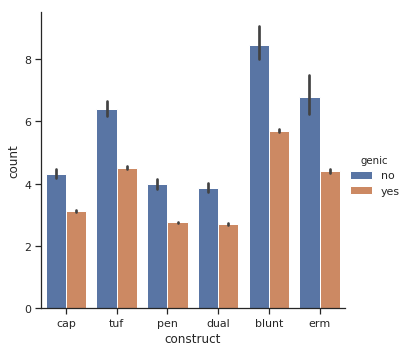

In [41]:
sns.catplot(x="construct",y="count",hue="genic",kind="bar",data=tdf)

A special case for the bar plot is when you want to show the number of observations in each category rather than computing a statistic for a second variable. This is similar to a histogram over a categorical, rather than quantitative, variable. In seaborn, it’s easy to do so with the [`countplot()`](https://seaborn.pydata.org/generated/seaborn.countplot.html#seaborn.countplot) function:

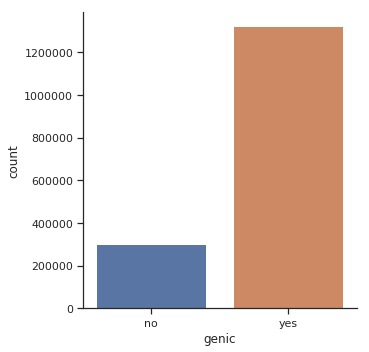

In [42]:
sns.catplot(x="genic",kind="count",data=tdf)

## Showing multiple relationships with facets
Just like [`relplot()`](https://seaborn.pydata.org/generated/seaborn.relplot.html#seaborn.relplot), the fact that [`catplot()`](https://seaborn.pydata.org/generated/seaborn.catplot.html#seaborn.catplot) is built on a [`FacetGrid`](https://seaborn.pydata.org/generated/seaborn.FacetGrid.html#seaborn.FacetGrid) means that it is easy to add faceting variables to visualize higher-dimensional relationships:

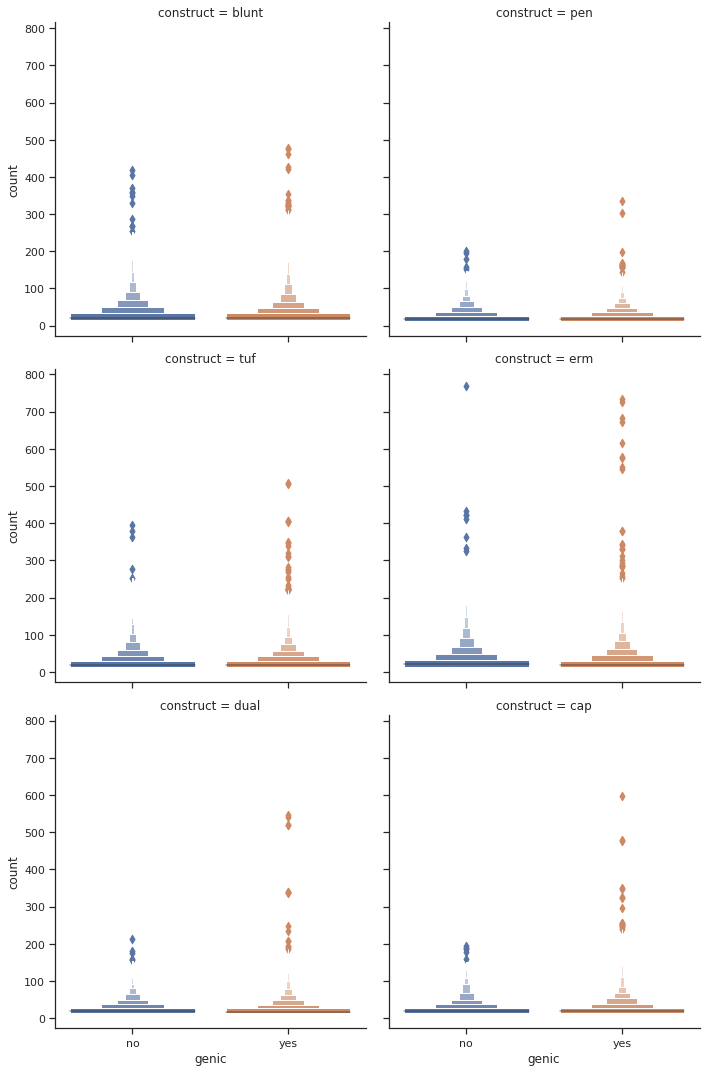

In [43]:
sns.catplot(x="genic", y="count", data=tdf[(tdf['count']>10) & (tdf['count']<1000)],kind="boxen",col='construct',col_wrap=2)